In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

!wget https://raw.githubusercontent.com/iraouiabdou/abdou_torch/main/abdou_torch.py
import abdou_torch
from abdou_torch import Tensor, Linear, MLP, WAdam

--2025-12-01 16:52:08--  https://raw.githubusercontent.com/iraouiabdou/abdou_torch/main/abdou_torch.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6557 (6.4K) [text/plain]
Saving to: ‘abdou_torch.py.2’

abdou_torch.py.2    100%[===================>]   6.40K  --.-KB/s    in 0s      

2025-12-01 16:52:08 (63.3 MB/s) - ‘abdou_torch.py.2’ saved [6557/6557]



In [18]:
X_data, y_data = make_blobs(n_samples=400, centers=2, n_features=2, cluster_std=1.4, random_state=42)

y_data = 2 * y_data - 1
y_data = y_data.reshape(-1, 1)

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

X_train = Tensor(X_train_data)
y_train = Tensor(y_train_data)

X_test = Tensor(X_test_data, requires_grad=False)
y_test = Tensor(y_test_data, requires_grad=False)

model = MLP(2, [16, 16, 1])

opt = WAdam(model.parameters(), lr=0.05, weight_decay=0.01)

steps = 1500
N_train = len(X_train_data)

In [19]:
for k in range(steps):

    scores = model(X_train)

    data_loss = ((scores - y_train)**2).sum() / N_train

    opt.zero_grad()
    data_loss.backward()

    opt.step()

    if k % 50 == 0:
        train_preds = np.where(scores.data > 0, 1, -1)
        train_acc = np.mean(train_preds == y_train.data)
        print(f"Step {k} | MSE Loss: {data_loss.data:.4f} | Train Acc: {train_acc*100:.1f}%")

test_scores = model(X_test)
test_preds = np.where(test_scores.data > 0, 1, -1)
test_acc = np.mean(test_preds == y_test.data)
print(f"\nFinal Test Accuracy (Unseen Data): {test_acc*100:.1f}%")


Step 0 | MSE Loss: 29.5137 | Train Acc: 47.2%
Step 50 | MSE Loss: 0.1339 | Train Acc: 100.0%
Step 100 | MSE Loss: 0.0408 | Train Acc: 100.0%
Step 150 | MSE Loss: 0.0318 | Train Acc: 100.0%
Step 200 | MSE Loss: 0.0258 | Train Acc: 100.0%
Step 250 | MSE Loss: 0.0187 | Train Acc: 100.0%
Step 300 | MSE Loss: 0.0133 | Train Acc: 100.0%
Step 350 | MSE Loss: 0.0110 | Train Acc: 100.0%
Step 400 | MSE Loss: 0.0098 | Train Acc: 100.0%
Step 450 | MSE Loss: 0.0087 | Train Acc: 100.0%
Step 500 | MSE Loss: 0.0076 | Train Acc: 100.0%
Step 550 | MSE Loss: 0.0065 | Train Acc: 100.0%
Step 600 | MSE Loss: 0.0052 | Train Acc: 100.0%
Step 650 | MSE Loss: 0.0042 | Train Acc: 100.0%
Step 700 | MSE Loss: 0.0037 | Train Acc: 100.0%
Step 750 | MSE Loss: 0.0051 | Train Acc: 100.0%
Step 800 | MSE Loss: 0.0028 | Train Acc: 100.0%
Step 850 | MSE Loss: 0.0025 | Train Acc: 100.0%
Step 900 | MSE Loss: 0.0021 | Train Acc: 100.0%
Step 950 | MSE Loss: 0.0020 | Train Acc: 100.0%
Step 1000 | MSE Loss: 0.0019 | Train Acc: 1

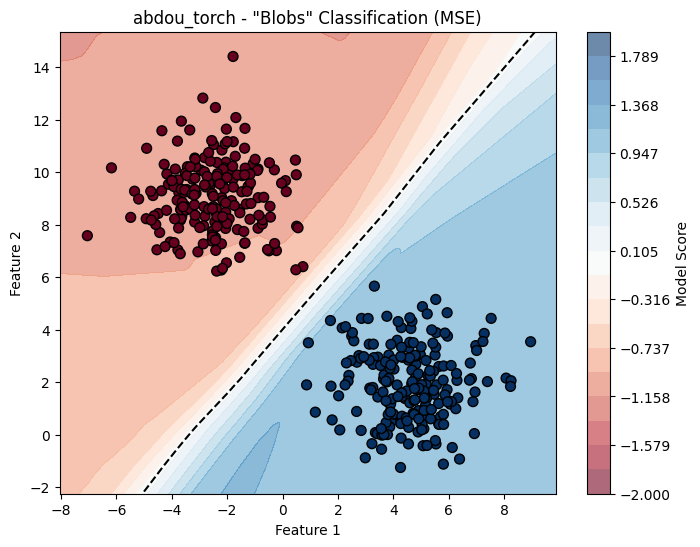

In [20]:
h = 0.1

x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))


mesh_points = np.c_[xx.ravel(), yy.ravel()]
inputs = Tensor(mesh_points)

Z = model(inputs)
Z = Z.data.reshape(xx.shape)

plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, Z, levels=np.linspace(-2, 2, 20), cmap='RdBu', alpha=0.6)
plt.colorbar(label='Model Score')
plt.contour(xx, yy, Z, levels=[0], colors='k', linestyles='--')

plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data.ravel(), cmap='RdBu', edgecolors='k', s=50)

plt.title('abdou_torch - "Blobs" Classification (MSE)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()